                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

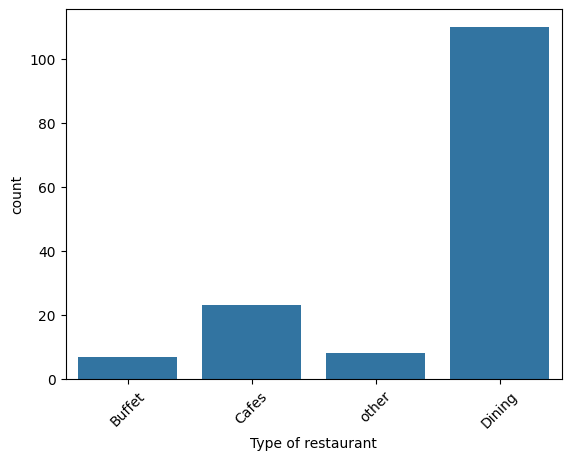

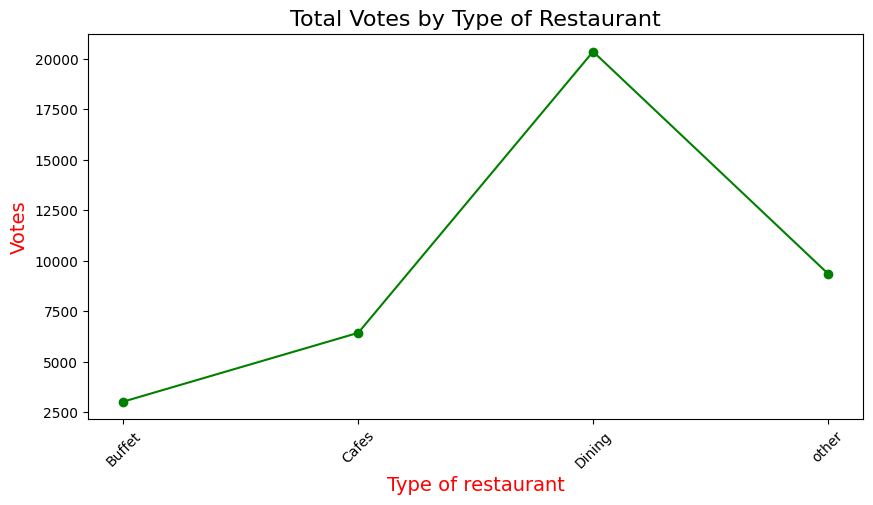

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


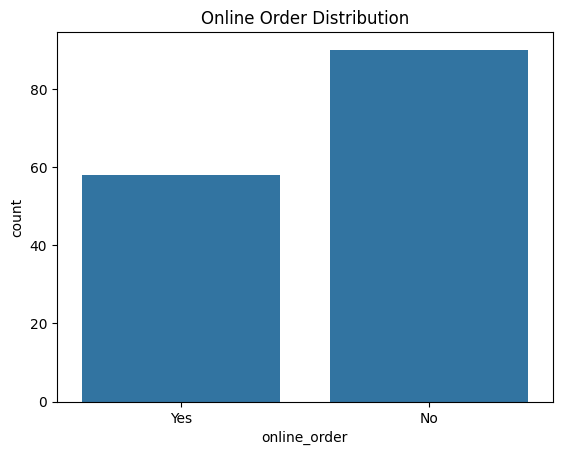

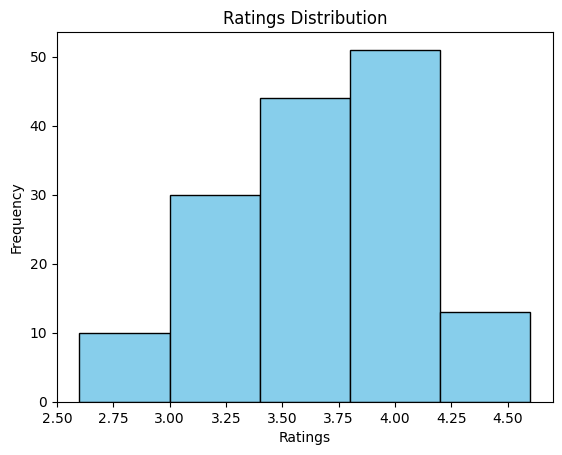

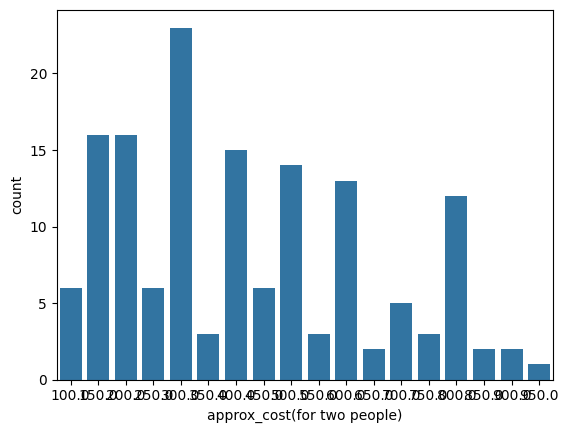

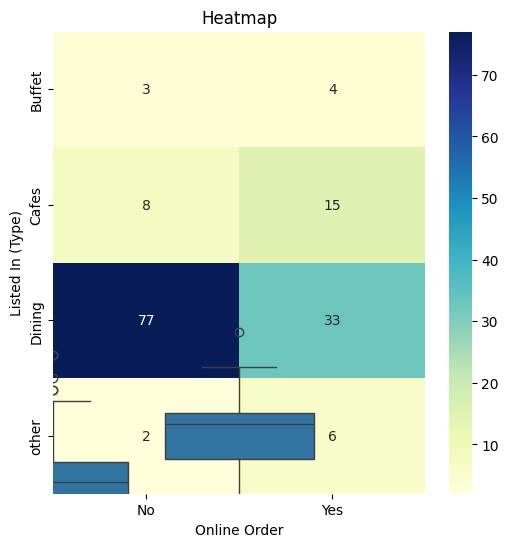

In [5]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  

# Load dataset
df = pd.read_csv(r"C:\Users\tej\Downloads\Zomato-data-.csv")  


def handleRate(value):
    try:
        value = str(value).split('/')[0] 
        return float(value)  
    except:
        return np.nan  

df['rate'] = df['rate'].apply(handleRate)

# Display first 5 rows and dataset info
print(df.head())
print(df.info())

# Countplot for restaurant types
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.xticks(rotation=45)  
plt.show()

# Grouping votes by restaurant type
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data}) 

# Plot total votes by restaurant type
plt.figure(figsize=(10, 5))  
plt.plot(result.index, result['votes'], c='green', marker='o', linestyle='-')

plt.xlabel('Type of restaurant', color='red', fontsize=14)
plt.ylabel('Votes', color='red', fontsize=14)
plt.title('Total Votes by Type of Restaurant', fontsize=16)

plt.xticks(rotation=45)
plt.show()

# Finding the restaurant with the most votes
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

# approx cost for 2 ppl
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=True)  
    .replace('nan', np.nan)  
    .astype(float)  
)

# Countplot for 'online_order'
sns.countplot(x=df['online_order'])
plt.title('Online Order Distribution')
plt.show()

# Histogram for 'rate' column
plt.hist(df['rate'].dropna(), bins=5, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()